<a href="https://colab.research.google.com/github/tamalmisra/DeepfakeImageDetection/blob/main/DeepfakeImgGraph.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Found 16 images belonging to 2 classes.
Found 4 images belonging to 2 classes.
Found 2 images belonging to 2 classes.
Epoch 1/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14s/step - accuracy: 0.5000 - loss: 0.7148
Epoch 1: val_accuracy improved from -inf to 1.00000, saving model to best_model.keras
1/1 ━━━━━━━━━━━━━━━━━━━━ 17s 17s/step - accuracy: 0.5000 - loss: 0.7148 - val_accuracy: 1.0000 - val_loss: 0.6827 - learning_rate: 0.0010
Epoch 2/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.6250 - loss: 0.6687
Epoch 2: val_accuracy did not improve from 1.00000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.6250 - loss: 0.6687 - val_accuracy: 0.5000 - val_loss: 0.6618 - learning_rate: 0.0010
Epoch 3/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.6875 - loss: 0.6411
Epoch 3: val_accuracy did not improve from 1.00000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.6875 - loss: 0.6411 - val_accuracy: 0.5000 - val_loss: 0.6423 - learning_rate: 0.0010
Epoch 4/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 1

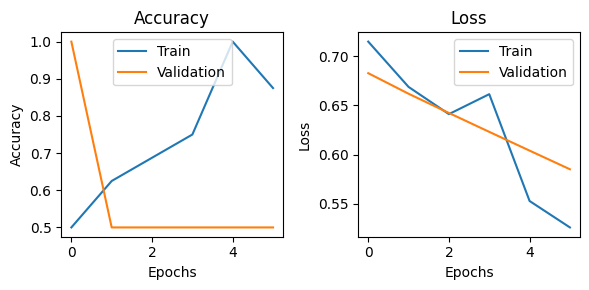

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 367ms/step - accuracy: 0.5000 - loss: 0.8084
Test Accuracy: 50.00%
Epoch 1/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38s/step - accuracy: 0.3750 - loss: 0.6944
Epoch 1: val_accuracy did not improve from 1.00000
1/1 ━━━━━━━━━━━━━━━━━━━━ 43s 43s/step - accuracy: 0.3750 - loss: 0.6944 - val_accuracy: 1.0000 - val_loss: 0.6821 - learning_rate: 1.0000e-05
Epoch 2/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 6s/step - accuracy: 0.3125 - loss: 0.7109
Epoch 2: val_accuracy did not improve from 1.00000
1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step - accuracy: 0.3125 - loss: 0.7109 - val_accuracy: 1.0000 - val_loss: 0.6815 - learning_rate: 1.0000e-05
Epoch 3/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.6250 - loss: 0.6544
Epoch 3: val_accuracy did not improve from 1.00000
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.6250 - loss: 0.6544 - val_accuracy: 1.0000 - val_loss: 0.6810 - learning_rate: 1.0000e-05
Epoch 4/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.5000 - loss: 0.6916
Epoch

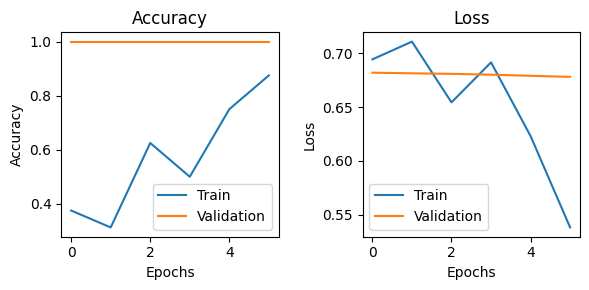

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


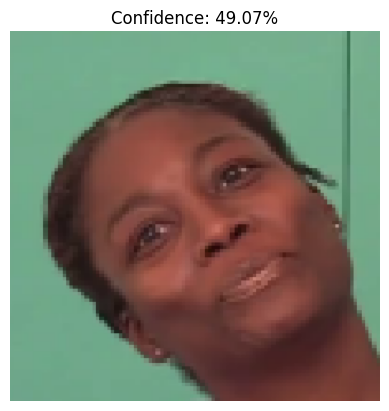

The image is classified as: Real (Confidence: 50.93%)


In [4]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing import image
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
import numpy as np
import os
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt

# Step 1: Prepare the dataset paths
train_dir = "/content/drive/MyDrive/split_dataset/train"
test_dir = "/content/drive/MyDrive/split_dataset/test"
val_dir = "/content/drive/MyDrive/split_dataset/val"

# Step 2: Use ImageDataGenerator to load and preprocess images
train_datagen = ImageDataGenerator(
    preprocessing_function=tf.keras.applications.efficientnet.preprocess_input,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

test_datagen = ImageDataGenerator(
    preprocessing_function=tf.keras.applications.efficientnet.preprocess_input
)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary',
    shuffle=False
)

val_generator = test_datagen.flow_from_directory(
    val_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary'
)

# Step 3: Load and modify the pre-trained EfficientNetB0 model
base_model = EfficientNetB0(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
base_model.trainable = False

model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dense(1, activation='sigmoid')
])

# Step 4: Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Step 5: Add callbacks
checkpoint = ModelCheckpoint("best_model.keras", monitor="val_accuracy", save_best_only=True, mode="max", verbose=1)
early_stopping = EarlyStopping(monitor="val_accuracy", patience=5, restore_best_weights=True, verbose=1)
reduce_lr = ReduceLROnPlateau(monitor="val_loss", factor=0.2, patience=3, min_lr=1e-6, verbose=1)

# Step 6: Train the model
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=20,
    callbacks=[checkpoint, early_stopping, reduce_lr]
)

# Step 7: Plot Training History
def plot_training_history(history):
    plt.figure(figsize=(6, 3))  # Reduced figure size

    # Accuracy Plot
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train')
    plt.plot(history.history['val_accuracy'], label='Validation')
    plt.title('Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    # Loss Plot
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train')
    plt.plot(history.history['val_loss'], label='Validation')
    plt.title('Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.tight_layout()
    plt.show()

plot_training_history(history)

# Step 8: Evaluate the model
test_loss, test_accuracy = model.evaluate(test_generator)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

# Step 9: Fine-tune the model
base_model.trainable = True
for layer in base_model.layers[:100]:
    layer.trainable = False

model.compile(optimizer=Adam(learning_rate=1e-5), loss='binary_crossentropy', metrics=['accuracy'])

history_fine = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=10,
    callbacks=[checkpoint, early_stopping, reduce_lr]
)

plot_training_history(history_fine)

# Step 10: Save the model
model.save("fake_image_detector_finetuned.keras")

# Step 11: Predict function with confidence visualization
def predict_image(img_path, threshold=0.5):
    img = image.load_img(img_path, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = tf.keras.applications.efficientnet.preprocess_input(img_array)

    prediction = model.predict(img_array)
    confidence = prediction[0][0]

    plt.imshow(img)
    plt.axis('off')
    plt.title(f"Confidence: {confidence * 100:.2f}%")
    plt.show()

    if confidence < threshold:  # Adjusted for correct classification
        return f"Real (Confidence: {(1 - confidence) * 100:.2f}%)"
    else:
        return f"Fake (Confidence: {confidence * 100:.2f}%)"

# Test Prediction
image_path = "/content/drive/MyDrive/split_dataset/test/real/abarnvbtwb-000-00.png"
result = predict_image(image_path)
print(f"The image is classified as: {result}")
